# Part-1

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("california_housing_train.csv")

# Part-2

### A.

In [14]:
def loss(y_pred,y_true):
    mse = np.sum((y_pred-y_true)**2)/len(y_true)
    return mse

### B.

In [15]:
def y_prediction(x,a,b):
    m,n = x.shape
    y_pred = x@a+b
    assert(y_pred.shape == (m,))
    return y_pred

### C.

In [16]:
def gradient(x,a,b,y_true):
    m,n = x.shape
    yp = y_prediction(x,a,b)
    da = (x.T@(yp-y_true))*2/m
    db = np.sum((yp-y_true)*2/m)
    assert(da.shape ==(n,))
    return (da,db)

### D

In [17]:
def gradient_descent(x,y_true,learning_rate=0.01,epochs = 10):
    m,n = x.shape
    loss_mse = []
    a = np.random.normal(0, 0.5, size = (n,)) * np.sqrt(2/n)
    b = 0
    for i in range(epochs):
        da,db=gradient(x,a,b,y_true)
        a=a-learning_rate*da
        b=b-learning_rate*db
        y_pred = y_prediction(x, a, b)
        l_mse=loss(y_pred,y_true)
        loss_mse.append(l_mse)
        print("Epoch ",i+1," Completed!","loss = ",l_mse)
    print("Training completed!!")
    assert(a.shape==(n,))
    return (loss_mse,a,b)

## Part-3

Epoch  1  Completed! loss =  52490433236.632095
Epoch  2  Completed! loss =  48866234649.12588
Epoch  3  Completed! loss =  45527292623.160065
Epoch  4  Completed! loss =  42450621204.81734
Epoch  5  Completed! loss =  39615212254.772705
Epoch  6  Completed! loss =  37001831228.80721
Epoch  7  Completed! loss =  34592842910.13151
Epoch  8  Completed! loss =  32372060756.778492
Epoch  9  Completed! loss =  30324615170.222145
Epoch  10  Completed! loss =  28436837175.47653
Epoch  11  Completed! loss =  26696154859.30097
Epoch  12  Completed! loss =  25091000535.162598
Epoch  13  Completed! loss =  23610727057.828823
Epoch  14  Completed! loss =  22245532044.319576
Epoch  15  Completed! loss =  20986389005.28158
Epoch  16  Completed! loss =  19824984575.80669
Epoch  17  Completed! loss =  18753661174.559216
Epoch  18  Completed! loss =  17765364527.141968
Epoch  19  Completed! loss =  16853595572.755327
Epoch  20  Completed! loss =  16012366338.728151
Epoch  21  Completed! loss =  1523615

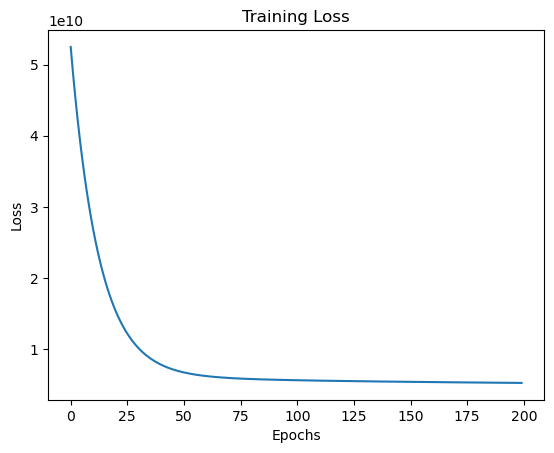

In [18]:
arr = np.array(df.drop('median_house_value', axis=1)).T

for i in range(len(arr)):
  arr[i] = (arr[i]-np.mean(arr[i]))/np.std(arr[i], axis=0)

y_train = np.array(df['median_house_value'])  # extract the price column from data
x_train = arr.T

epochs = 200      
learn_rate = 0.02

train_loss,a,b = gradient_descent(x_train, y_train, learn_rate, epochs)

plt.plot([i for i in range(epochs)], train_loss)                   # plot loss versus epochs
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()